# Goal: 

**examine whether there is a (statistically) significant difference in mean tau SUVR values between the right and left hemispheres of a lobar ROI (MTL, temporal, frontal, occipital, parietal)**

Methods: 
1) SuStaIn: mean value of the z-scores 
2) Daniel: z-ratio 
3) Christina Young: hemispheric asymmetry index = 200 x (right - lfet) / (right + left) 
 https://jamanetwork.com/journals/jamaneurology/fullarticle/2790807 


For each: 
- formulation 
- interpretation
- code&visualization
- 1-sample t-test 



In [160]:
import pandas as pd
import numpy as np
import seaborn as sns
from IPython.display import display, Math
import matplotlib.pyplot as plt
import scipy.stats as stats

# Data read-in

In [145]:
cpath = '/Users/linlin/Library/Mobile Documents/com~apple~CloudDocs/Desktop/2024/AD lab/dataexp/pySuStaIn/notebooks/dat/'
lobes = ['L_MTL', 'R_MTL', 'L_temporal', 'R_temporal', 'L_frontal', 'R_frontal', 
         'L_occipital', 'R_occipital','L_parietal', 'R_parietal' ]  
 
lftp = pd.read_csv(cpath+'lftp.csv')
df = pd.read_csv(cpath+'wide_data.csv')
dat = df.loc[:,lobes].values 
cn_idx = df.index[df['dx'] == 'CN']
eoad_idx = df.index[df['dx'] == 'EOAD'] 
df.head(5)


,subj,dx,L_MTL,L_frontal,L_occipital,L_parietal,L_temporal,R_MTL,R_frontal,R_occipital,R_parietal,R_temporal
0,LDS0070120,CN,1.212698,1.037903,1.103603,1.074372,1.127232,1.210549,1.028599,1.109314,1.082730,1.142007
1,LDS0070166,EOAD,1.856240,2.398487,2.957153,3.012157,2.856721,1.695600,2.164095,2.754564,2.877221,2.635381
2,LDS0070174,EOAD,1.329493,1.721040,2.092321,2.439468,2.290511,1.271227,1.672417,1.870114,2.308416,2.221782
3,LDS0070176,CN,1.081001,1.037954,1.073957,1.074079,1.071031,1.057533,1.043352,1.067993,1.083906,1.084702
4,LDS0070199,EOAD,1.493937,1.544302,1.628214,1.868473,1.856816,1.412091,1.544987,1.697627,1.814367,1.767196


# SUVR compare

In [151]:
lftp['hemi'] = lftp['lobe'].apply(lambda x: 'L' if x.startswith('L') else 'R')
lftp['roi'] = lftp['lobe'].apply(lambda x: x.split('_')[-1])
lftp

,Unnamed: 0,subj,dx,lobe,mean_suvr,hemi,roi
0,0,LDS0070120,CN,L_MTL,1.212698,L,MTL
1,1,LDS0070120,CN,L_frontal,1.037903,L,frontal
2,2,LDS0070120,CN,L_occipital,1.103603,L,occipital
3,3,LDS0070120,CN,L_parietal,1.074372,L,parietal
4,4,LDS0070120,CN,L_temporal,1.127232,L,temporal
...,...,...,...,...,...,...,...
4665,4665,LDS9410679,EOAD,R_MTL,1.992033,R,MTL
4666,4666,LDS9410679,EOAD,R_frontal,1.848754,R,frontal
4667,4667,LDS9410679,EOAD,R_occipital,1.883089,R,occipital
4668,4668,LDS9410679,EOAD,R_parietal,2.083823,R,parietal


In [187]:
 
 
def cohen_d(x, y):
    nx = len(x)
    ny = len(y)
    dof = nx + ny - 2
    pooled_std = np.sqrt(((nx - 1) * np.var(x, ddof=1) + (ny - 1) * np.var(y, ddof=1)) / dof)
    return (np.mean(x) - np.mean(y)) / pooled_std

# Split the data based on conditions and perform t-tests
def t_test_lobes(df,name,thre,conditions=["overall", "CN", "EOAD"]):
    results = []
    lobes = df['roi'].unique()
    
    for condition in conditions:
        for roi in lobes:
            if condition != "overall":
                condition_df = df[df['dx'] == condition]
            else:
                condition_df = df
            
            lobe_df = condition_df[condition_df['roi'] == roi]
            left_hemi = lobe_df[lobe_df['hemi'] == 'L'][name]
            right_hemi = lobe_df[lobe_df['hemi'] == 'R'][name]
            if len(left_hemi) > 0 and len(right_hemi) > 0:
                t_stat, p_value = stats.ttest_ind(left_hemi, right_hemi, equal_var=False)
                effect_size = round(cohen_d(left_hemi, right_hemi),4)
            else:
                t_stat, p_value, effect_size = np.nan, np.nan, np.nan
            
            results.append({
                "condition": condition,
                "lobe": roi,
                "effect_size": effect_size,
                "p_value": p_value,
                "significance": p_value < thre,
            })
    
    return pd.DataFrame(results)
t_test_lobes(lftp,'mean_suvr',0.05)


,condition,lobe,effect_size,p_value,significance
0,overall,MTL,0.0722,0.269973,False
1,overall,frontal,0.0691,0.291265,False
2,overall,occipital,0.0387,0.554575,False
3,overall,parietal,0.0380,0.561254,False
4,overall,temporal,0.0798,0.222752,False
5,CN,MTL,-0.0208,0.890353,False
6,CN,frontal,-0.0731,0.628336,False
7,CN,occipital,0.0993,0.510787,False
8,CN,parietal,0.0170,0.910250,False
9,CN,temporal,0.0219,0.884475,False


## bootstrap results

In [15]:
scb = pd.read_csv('/Users/linlin/Library/Mobile Documents/com~apple~CloudDocs/Desktop/2024/AD lab/dataexp/pySuStaIn/notebooks/process/scire/bootstrapped_stats.csv')
scb['hemi'] = scb['roi'].apply(lambda x: 'L' if x.startswith('L') else 'R')
scb['roi'] = scb['roi'].apply(lambda x: x.split('_')[-1])
scb['times']=(scb.index % 5) + 1
scb.head(5)

,roi,stat,value,hemi,times
0,MTL,mean1,1.178168,L,1
1,MTL,mean1,1.146109,L,2
2,MTL,mean1,1.157918,L,3
3,MTL,mean1,1.148488,L,4
4,MTL,mean1,1.145558,L,5


## compare z-scores

In [182]:
bgmm = pd.read_csv(cpath+'bgmmdata.csv')
zdf = pd.read_csv(cpath+'zdata.csv')
bgmm.head(2)

,L_MTL,R_MTL,L_temporal,R_temporal,L_frontal,R_frontal,L_occipital,R_occipital,L_parietal,R_parietal,dx,subj
0,0.762184,0.712056,-0.099457,0.182485,-0.547740,-0.819286,-0.185516,-0.024025,-0.246533,0.049455,CN,LDS0070120
1,9.063335,6.728621,32.301823,28.063757,25.098143,19.565545,37.458792,33.348817,32.426554,30.387741,EOAD,LDS0070166


### bgmm

In [179]:
transformed_data = []

# Iterate over the rows of the original DataFrame
for index, row in bgmm.iterrows():
    for hemi in ['L', 'R']:
        for roi in ['MTL', 'temporal', 'frontal', 'occipital', 'parietal']:
            lobe = f"{hemi}_{roi}"
            transformed_data.append({
                'subj': row['subj'],
                'dx': row['dx'],
                'lobe': lobe,
                'value': row[lobe],
                'hemi': hemi,
                'roi': roi
            })

# Create the transformed DataFrame
bgmmdf = pd.DataFrame(transformed_data)

In [189]:
t_test_lobes(bgmmdf,'value',0.05)

,condition,lobe,effect_size,p_value,significance
0,overall,MTL,0.1206,0.065608,False
1,overall,temporal,0.0838,0.200500,False
2,overall,frontal,0.1369,0.036655,True
3,overall,occipital,0.0361,0.581291,False
4,overall,parietal,0.0204,0.755210,False
5,CN,MTL,-0.0331,0.826393,False
6,CN,temporal,0.0155,0.918244,False
7,CN,frontal,0.0440,0.770617,False
8,CN,occipital,0.0538,0.721621,False
9,CN,parietal,-0.1367,0.365821,False


### z

In [183]:
transformed_data = []

# Iterate over the rows of the original DataFrame
for index, row in zdf.iterrows():
    for hemi in ['L', 'R']:
        for roi in ['MTL', 'temporal', 'frontal', 'occipital', 'parietal']:
            lobe = f"{hemi}_{roi}"
            transformed_data.append({
                'subj': row['subj'],
                'dx': row['dx'],
                'lobe': lobe,
                'value': row[lobe],
                'hemi': hemi,
                'roi': roi
            })

# Create the transformed DataFrame
zdf = pd.DataFrame(transformed_data)

In [188]:
t_test_lobes(zdf,'value',0.05)

,condition,lobe,effect_size,p_value,significance
0,overall,MTL,0.1300,0.047329,True
1,overall,temporal,0.0823,0.208692,False
2,overall,frontal,0.1316,0.044653,True
3,overall,occipital,0.0315,0.629905,False
4,overall,parietal,0.0330,0.614210,False
5,CN,MTL,0.0000,1.000000,False
6,CN,temporal,0.0000,1.000000,False
7,CN,frontal,-0.0000,1.000000,False
8,CN,occipital,-0.0000,1.000000,False
9,CN,parietal,0.0000,1.000000,False


# Method

- $X_{jL}$: Measurement of tau mean SUVR in the left hemisphere for subject j  
- $X_{jR}$: Measurement of tau mean SUVR in the left hemisphere for subject j  
- $\mu_{L}$ and $\sigma_{L}$: Mean and standard deviation of measurements in the left hemisphere.
- $\mu_{R}$ and $\sigma_{R}$: Mean and standard deviation of measurements in the right hemisphere.


## Vogel et al

### text: 
(ambiguous: )

Comparison of the **mean tau-PET signal (tau-Z) across all ROIs, after adjustment for total cortical tau**. 

A value of 0 represents regional tau Z-score proportionate to the average cortical tau Z-score in that subtype. 

The left panel represents left hemisphere, the right panel represents right hemisphere. Values represent means +/− SEM.

https://www.nature.com/articles/s41591-021-01309-6/figures/8 


<i>I have no idea what "the adjustment for total cortical tau" entails.</i> 
<i>(one value for each ROI across all subjects)</i>

Tau lateralization was measured as the **mean right to left ratio of scores** for all ten tau features. 

Higher positive numbers represent greater left hemisphere tau lateralization, whereas lower negative numbers represent greater right hemisphere lateralization. 

Also the absolute (that is agnostic to hemisphere) lateralization 

https://www.nature.com/articles/s41591-021-01309-6/figures/14

<i>(one value for each subject across all ROIs)</i>

### formulation: 



Standardization and Ratio Calculation
The z-scores are derived by standardizing the measurements using the mean and standard deviation in the left and right hemispheres respectively:
$$
Z_{jL} = \frac{X_{jL} - \mu_L}{\sigma_L}
$$
$$
Z_{jR} = \frac{X_{jR} - \mu_R}{\sigma_R}
$$

The left to right ratio of z-scores for each subject \( j \) is calculated as:
$$
\text{ratio}_j = \frac{Z_{jR}}{Z_{jL}} = \frac{\frac{X_{jR} - \mu_R}{\sigma_L}}{\frac{X_{jL} - \mu_L}{\sigma_R}} = \frac{(X_{jR} - \mu_R) \cdot \sigma_L}{(X_{jL} - \mu_L) \cdot \sigma_R}
$$

 
The mean lateralization across all subjects is:
$$
\text{lateralization score} = \frac{1}{N} \sum_{j=1}^{N} \frac{(X_{jR} - \mu_R) \cdot \sigma_L}{(X_{jL} - \mu_L) \cdot \sigma_R}
$$


### interpretation

- Symmetry Benchmark: A ratio of 1 indicates symmetry between the left and right hemispheres. 
- Greater than 1 suggests a tendency towards greater tau deposition in the left hemisphere.
- Less than 1 suggests a tendency towards greater tau deposition in the right hemisphere.


### code 

In [163]:
meanzdf = pd.DataFrame(columns=['hemi', 'roi', 'type','lobe' 'value'])

mean_values = scb[scb['stat'] == 'mean1'][['roi', 'hemi','value']]
sd_values = scb[scb['stat'] == 'sd1'][['roi', 'hemi','value']]
  
for roi in ['MTL', 'frontal', 'occipital', 'parietal', 'temporal']:
    for hemi in ['L', 'R']:
        mean_vals = mean_values[(mean_values.roi == roi) & (mean_values.hemi == hemi)].value.tolist()
        sd_vals = sd_values[(sd_values.roi == roi) & (sd_values.hemi == hemi)].value.tolist()
        col_name = f"{hemi}_{roi}" 
        for i in range(5000): 
            temp_dat = (df[col_name] - mean_vals[i]) / sd_vals[i]
            overall_z = np.mean(temp_dat)
            cn_z = np.mean(temp_dat[cn_idx])
            eoad_z = np.mean(temp_dat[eoad_idx])
            tempdf = pd.DataFrame({
                'hemi':hemi,
                'roi':roi,
                'lobe':col_name,
                'type':['overall','eoad','cn'],
                'value':[overall_z,eoad_z,cn_z]
            })
            meanzdf = pd.concat([meanzdf,tempdf],ignore_index=True)




KeyboardInterrupt: 

In [117]:
meanzdf

,hemi,roi,type,times,value,lobe
0,L,MTL,overall,NaN,3.633925,L_MTL
1,L,MTL,eoad,NaN,4.571900,L_MTL
2,L,MTL,cn,NaN,-0.405762,L_MTL
3,L,MTL,overall,NaN,5.522878,L_MTL
4,L,MTL,eoad,NaN,6.827626,L_MTL
...,...,...,...,...,...,...
59830,R,frontal,eoad,NaN,10.129643,R_frontal
59831,R,frontal,cn,NaN,-0.197246,R_frontal
59832,R,frontal,overall,NaN,8.039350,R_frontal
59833,R,frontal,eoad,NaN,9.979167,R_frontal


In [137]:
 
# Function to plot boxplots of differences in value for L and R hemispheres for each ROI
def plot_boxplots(meanzdf, plot_type):
    # Filter the DataFrame based on the type
    df_filtered = meanzdf[meanzdf['type'] == plot_type]

    # Calculate the differences between L and R for each ROI
    differences = []
    for roi in df_filtered['roi'].unique():
        l_values = df_filtered[(df_filtered['roi'] == roi) & (df_filtered['hemi'] == 'L')]['value'].values
        r_values = df_filtered[(df_filtered['roi'] == roi) & (df_filtered['hemi'] == 'R')]['value'].values
        if len(l_values) > 0 and len(r_values) > 0:
            for l, r in zip(l_values, r_values):
                differences.append({'roi': roi, 'difference': r-l})#r/l

    differences_df = pd.DataFrame(differences)

    # Plot the boxplots
    plt.figure(figsize=(12, 6))
    sns.boxplot(x='roi', y='difference', data=differences_df)
    plt.title(f'Boxplot of Differences in Value for L and R Hemispheres ({plot_type})')
    plt.ylabel('Difference (L - R)')
    plt.xlabel('ROI')
    plt.ylim([-25,25])
    plt.axhline(0, color='red', linestyle='--')
    plt.show()


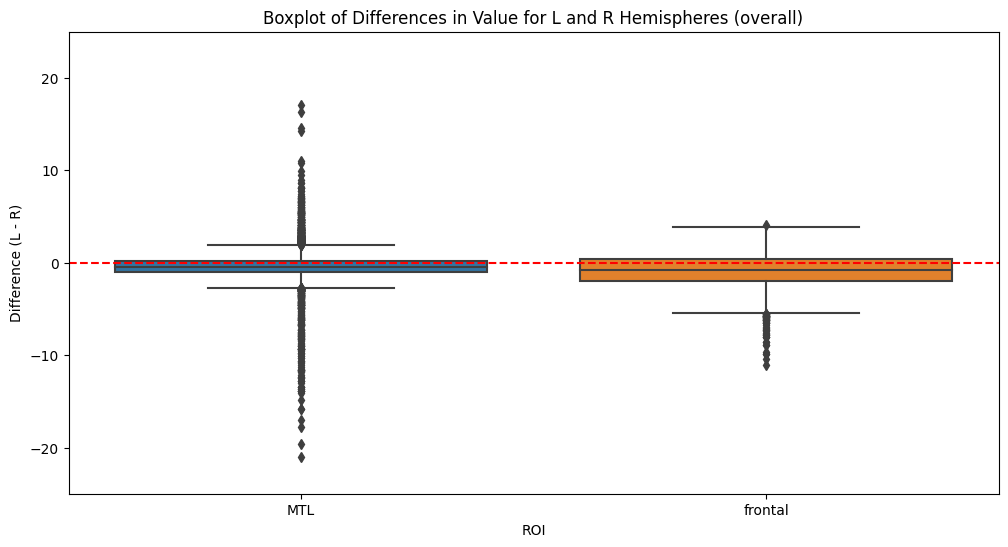

ValueError: Could not interpret input 'roi'

<Figure size 1200x600 with 0 Axes>

In [139]:


# Plot boxplots for "overall", "CN", and "EOAD"
for plot_type in ['overall', 'CN', 'EOAD']:
    plot_boxplots(meanzdf, plot_type)


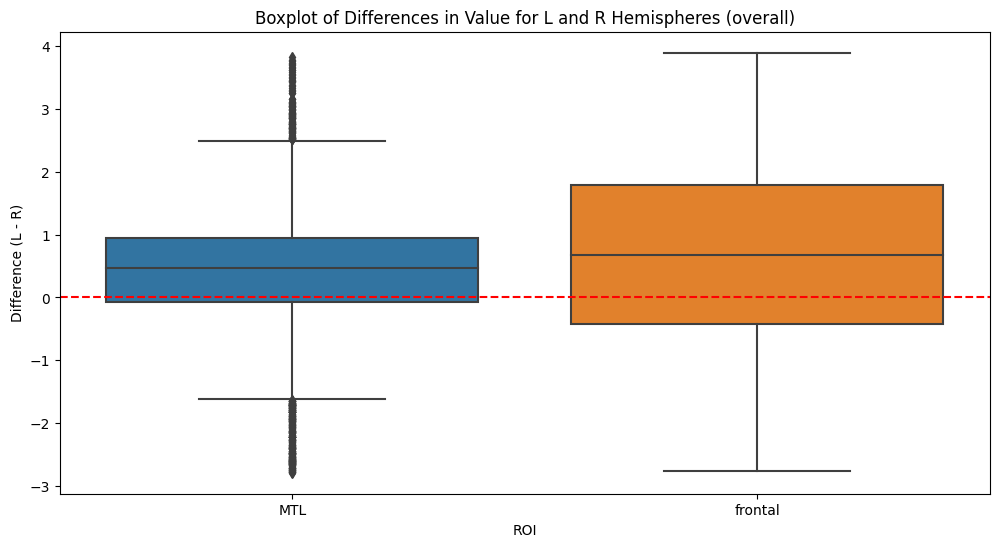

KeyError: 'difference'

In [140]:
 

# Function to filter out outliers using IQR method
def filter_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Function to plot boxplots of differences in value for L and R hemispheres for each ROI and perform t-tests
def plot_boxplots_and_ttests(meanzdf, plot_type):
    # Filter the DataFrame based on the type
    df_filtered = meanzdf[meanzdf['type'] == plot_type]

    # Calculate the differences between L and R for each ROI
    differences = []
    for roi in df_filtered['roi'].unique():
        l_values = df_filtered[(df_filtered['roi'] == roi) & (df_filtered['hemi'] == 'L')]['value'].values
        r_values = df_filtered[(df_filtered['roi'] == roi) & (df_filtered['hemi'] == 'R')]['value'].values
        if len(l_values) > 0 and len(r_values) > 0:
            for l, r in zip(l_values, r_values):
                differences.append({'roi': roi, 'difference': l - r})

    differences_df = pd.DataFrame(differences)
    
    # Filter out outliers
    filtered_differences_df = filter_outliers(differences_df, 'difference')

    # Perform one-sample t-test
    ttest_results = []
    for roi in filtered_differences_df['roi'].unique():
        roi_differences = filtered_differences_df[filtered_differences_df['roi'] == roi]['difference']
        t_stat, p_value = stats.ttest_1samp(roi_differences, 0)
        ttest_results.append({'roi': roi, 't_stat': t_stat, 'p_value': p_value})

    ttest_results_df = pd.DataFrame(ttest_results)

    # Plot the boxplots
    plt.figure(figsize=(12, 6))
    sns.boxplot(x='roi', y='difference', data=filtered_differences_df)
    plt.title(f'Boxplot of Differences in Value for L and R Hemispheres ({plot_type})')
    plt.ylabel('Difference (L - R)')
    plt.xlabel('ROI')
    plt.axhline(0, color='red', linestyle='--')
    plt.show()

    return ttest_results_df

# Plot boxplots and perform t-tests for "overall", "CN", and "EOAD"
ttest_results_overall = plot_boxplots_and_ttests(meanzdf, 'overall')
ttest_results_cn = plot_boxplots_and_ttests(meanzdf, 'CN')
ttest_results_eoad = plot_boxplots_and_ttests(meanzdf, 'EOAD')

print("T-test Results (Overall):")
print(ttest_results_overall)
print("\nT-test Results (CN):")
print(ttest_results_cn)
print("\nT-test Results (EOAD):")
print(ttest_results_eoad)


## Daniel

### text

z-ratio is calcualated as (1- mean) / standard deviation, which would be a single value to reflect the combined effect of mean and standard deviation on the standardization process for each ROI. 

Laterality (index) is calculated as the difference between the z-ratios: z-ratio of right - z-ratio of left 

### formulation 



$$\text{lateralization score} = \frac{1 - \mu_R}{\sigma_R} - \frac{1 - \mu_L}{\sigma_L}$$

### interpretation

- Symmetry benchmark: A score of 0 would indicate symmetry between the left and right hemispheres. 
- A positive lateralization score suggests greater tau deposition in the right hemisphere compared to the right hemisphere.
- A negative lateralization score suggests greater tau deposition in the left hemisphere compared to the left hemisphere.


### code 

In [170]:
zscb = scb[scb.stat == 'z']

t_test_lobes(zscb,'value',0.05,["overall"])

,condition,lobe,effect_size,p_value,significance
0,overall,MTL,-0.100470,5.178125e-07,True
1,overall,temporal,-0.489144,5.329739e-128,True
2,overall,frontal,0.864235,0.000000e+00,True
3,overall,occipital,0.053833,7.132030e-03,True
4,overall,parietal,0.474764,4.555484e-121,True


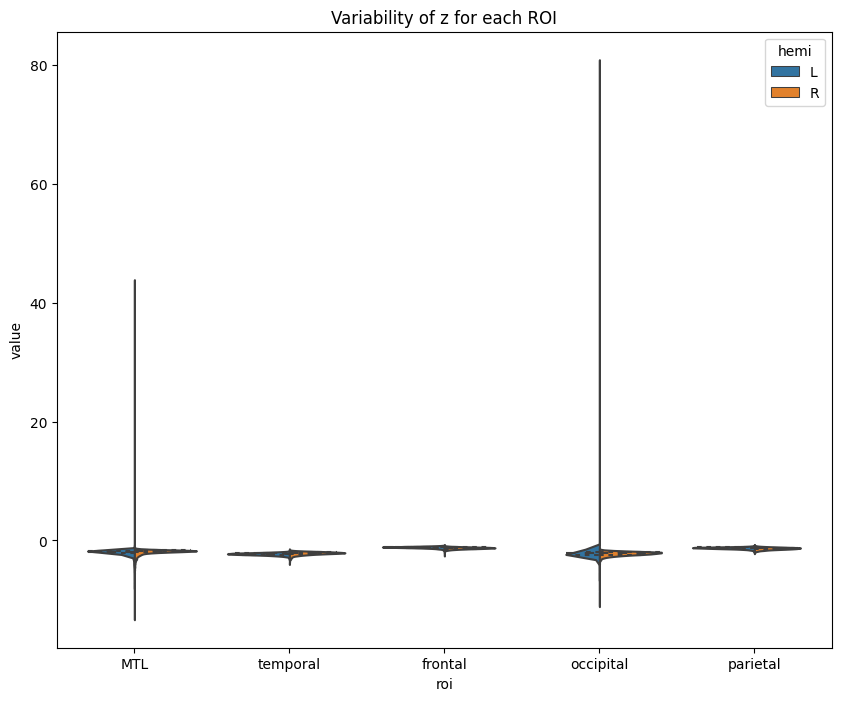

In [58]:
plt.figure(figsize=(10,8))
fscb = scb[scb.value < 10]
fscb = fscb[fscb.value > -5]
sns.violinplot(x='roi', y='value', data=scb[scb.stat=='z'],   hue='hemi', split=True,inner='quart')
plt.title('Variability of z for each ROI')
plt.show()


## Lateralization index


### text

hemispheric asymmetry index = 200 x (right - lfet) / (right + left) ref. [ossenkoppele et al](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5006248/ ) which claims to resemble AI (asymmetry index) [Rabinovici et al. (2008)](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2648510/) and [Frings et al. (2015)](https://academic.oup.com/brain/article/138/10/3089/2468716?login=true)  

<i>one score for one individual in one lobar roi unless take mean acorss subjects</i>

### formulation

$$\text{hemispheric asymmetry index} = 2 \cdot \frac{Z_{R} - Z_{L}}{Z_{R} + Z_{L}}$$ 

$$\text{lateralization score} = \frac{2}{N} \sum_{j=1}^{N}\frac{(X_{jR} - \mu_{R})\sigma_{L} - (X_{jL} - \mu_{L})\sigma_{R}}{(X_{jR} - \mu_{R})\sigma_{L} + (X_{jL} - \mu_{L})\sigma_{R}}$$ 

### interpretation

- Symmetry benchmark: 0 would indicate symmetry
- Positive score: Indicates greater tau deposition in the right hemisphere.
- Negative score: Indicates greater tau deposition in the left hemisphere.
- multiplication by 200 is effectively divided the difference in L and R by the mean across R and L ROI then multipled by 100. 

### code

# Comparison

retain the Rabinovich version for the 3rd one. 

## simulation

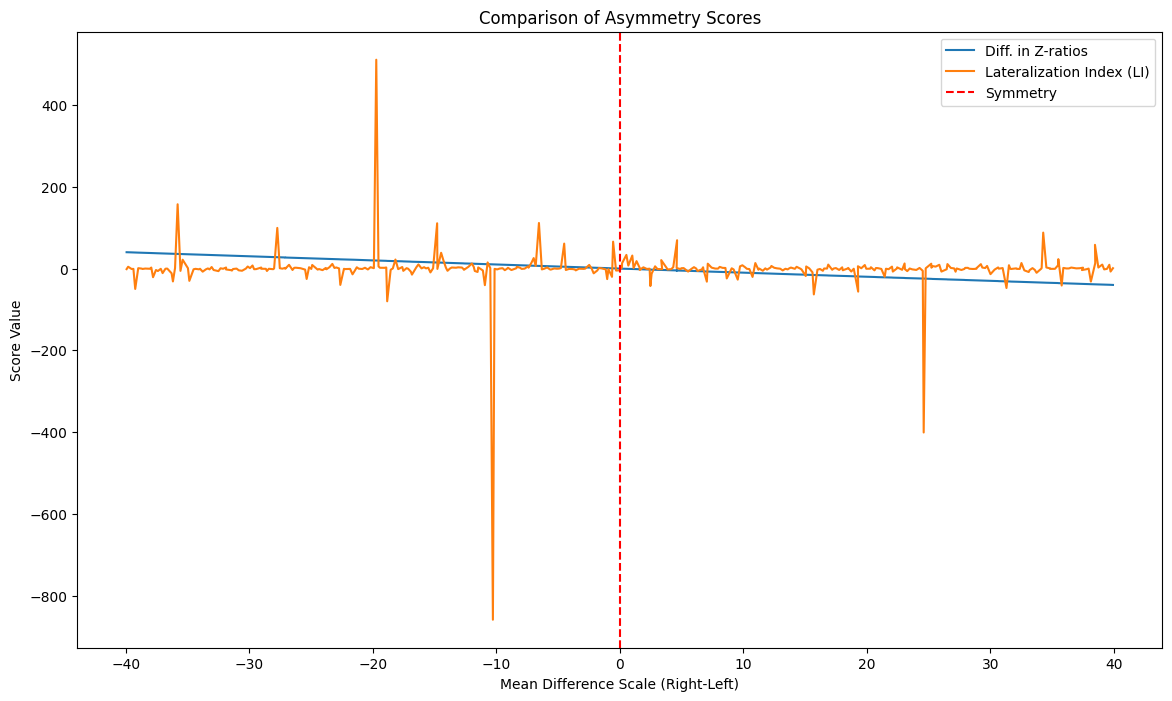

In [76]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
n_subjects = 400
mean_diff_scale = np.linspace(-2, 2, n_subjects)
sigma_L = 0.1
sigma_R = 0.1

# Initialize arrays to store the scores
SuStaIn_scores = []
Daniel_scores = []
Christina_Young_scores = []
LI_scores = []
mean_diffs = []
# Generate synthetic data and calculate scores
for mean_diff in mean_diff_scale:
    mu_L = 1.1 - mean_diff
    mu_R = 1.1 + mean_diff
    
    X_L = np.random.normal(mu_L, sigma_L, n_subjects)
    X_R = np.random.normal(mu_R, sigma_R, n_subjects)
    
    # Calculate Z-scores
    Z_L = (X_L - mu_L) / sigma_L
    Z_R = (X_R - mu_R) / sigma_R
    
    # Calculate the scores for each subject and asymmetry point
    SuStaIn = np.mean((X_R - mu_R) * sigma_L / ((X_L - mu_L) * sigma_R))
    Daniel = (1 - mu_R) / sigma_R - (1 - mu_L) / sigma_L
    #Christina_Young = np.mean(200 * (Z_R - Z_L) / (Z_R + Z_L))
    LI = np.mean(2 * (Z_R - Z_L) / (Z_R + Z_L))
    
    # Store the mean scores
    SuStaIn_scores.append(SuStaIn)
    Daniel_scores.append(Daniel)
    #Christina_Young_scores.append(Christina_Young)
    LI_scores.append(LI)
    mean_diffs.append(np.mean(X_R - X_L)*10)

# Convert scores to numpy arrays for plotting
SuStaIn_scores = np.array(SuStaIn_scores)
Daniel_scores = np.array(Daniel_scores)
#Christina_Young_scores = np.array(Christina_Young_scores)
LI_scores = np.array(LI_scores)
 
# Plotting the results
plt.figure(figsize=(14, 8))

#plt.plot(mean_diff_scale, SuStaIn_scores, label='Mean of Z-score Ratios')
plt.plot(mean_diffs, Daniel_scores, label='Diff. in Z-ratios')
#plt.plot(mean_diff_scale, Christina_Young_scores, label='Christina Young: Hemispheric Asymmetry Index')
plt.plot(mean_diffs, LI_scores, label='Lateralization Index (LI)')

plt.axvline(0, color='red', linestyle='--', label='Symmetry')

plt.title('Comparison of Asymmetry Scores')
plt.xlabel('Mean Difference Scale (Right-Left)')
plt.ylabel('Score Value')
plt.legend()
plt.show()
